### Jacobian Functional Form Analysis

In [308]:

# graph neural network 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree


import rootutils
root = rootutils.setup_root("./scripts/", dotenv=True, pythonpath=True,  indicator =  [".project-root"], cwd = True)


from scripts.nb_functions import find_filtered_voronoi_neighbor_knn_limited_mask
from scripts.environment import Environment

In [309]:

positions = []

data = []

for i in range(10):
    positions.append(np.load(f"positions/random_{i}_positions.npy"))
    SMAD_ERK = np.load(f"positions/random_{i}_SMAD_and_ERK.npy")
    SMAD_ERK = SMAD_ERK.swapaxes(1, 2)

    # SMAD_ERK[:,:,0] *= 100.
    # SMAD_ERK[:,:,1] *= 100.
    BMP = np.load(f"positions/random_{i}_BMP_levels.npy")
    FGF = np.load(f"positions/random_{i}_FGF_levels.npy")
    # SMAD_ERK = SMAD_ERK.swapaxes(1, 2)
    BMP_FGF = np.concatenate((BMP[:,:,None], FGF[:,:,None]), axis=2)

    d = BMP_FGF[:201,:,:]
    # d = SMAD_ERK[:201,:,:]

    # normalize the two channels independently
    d[:,:,0] = (d[:,:,0] - np.min(d[:,:,0])) / (np.max(d[:,:,0]) - np.min(d[:,:,0]))
    d[:,:,1] = (d[:,:,1] - np.min(d[:,:,1])) / (np.max(d[:,:,1]) - np.min(d[:,:,1]))
    data.append(d)
    # print(d.shape)
data = data[0]


edges, edge_weights, border_mask = Environment.get_edges(positions[0])
# find_filtered_voronoi_neighbor_knn_limited_mask
border_mask = np.array(border_mask)

nbs = find_filtered_voronoi_neighbor_knn_limited_mask(positions[0], 8)[0]
nb_mask = nbs >= 0

(1000, 8) (1000, 8)


In [310]:
S = data[:, :, 0]
E = data[:, :, 1]

print(E.shape)
dS = np.diff(S, axis=0)
dE = np.diff(E, axis=0)

nbsS = [S[:,nbs[i][nb_mask[i]]].mean(axis = 1) for i in range(len(nbs))]
nbsS = np.array(nbsS).T

nbsE = [E[:,nbs[i][nb_mask[i]]].mean(axis = 1) for i in range(len(nbs))]
nbsE = np.array(nbsE).T




(201, 1000)


In [144]:
nbsE.shape

(201, 1000)

In [145]:
S.shape


(201, 1000)

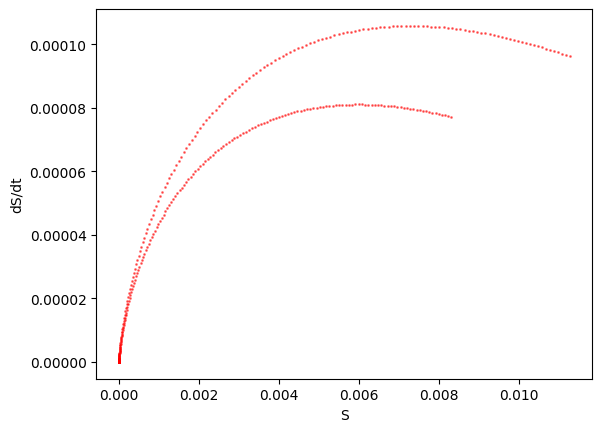

In [311]:
plt.scatter(S[:-1, 0], dS[:, 0], c='r', s=1, alpha=0.5)
plt.scatter(S[:-1, 10], dS[:, 10], c='r', s=1, alpha=0.5)
# plt.scatter(S[:-1, 3], dS[:, 3], c='r', s=1, alpha=0.5)
plt.xlabel("S")
plt.ylabel("dS/dt")
plt.show()

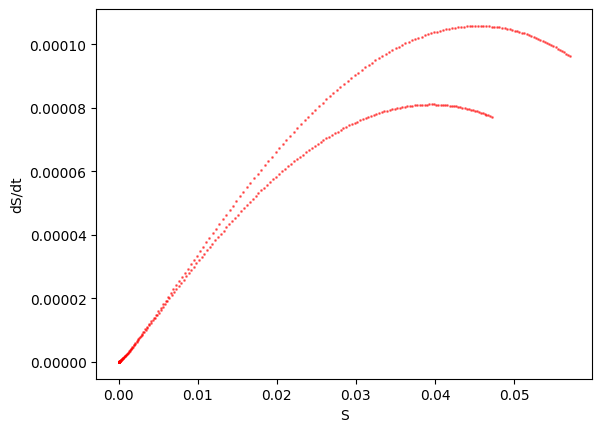

In [147]:
plt.scatter(E[:-1, 0], dS[:, 0], c='r', s=1, alpha=0.5)
plt.scatter(E[:-1, 10], dS[:, 10], c='r', s=1, alpha=0.5)
# plt.scatter(S[:-1, 3], dS[:, 3], c='r', s=1, alpha=0.5)
plt.xlabel("S")
plt.ylabel("dS/dt")
plt.show()

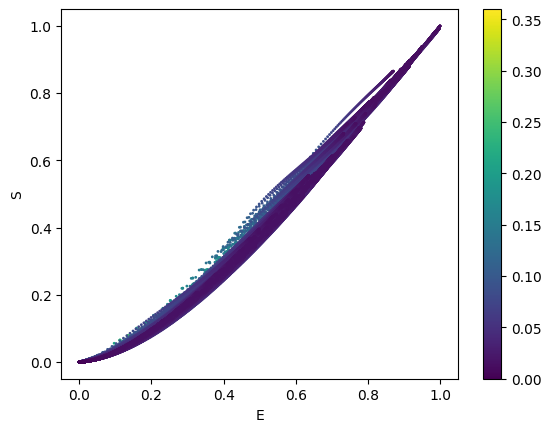

In [148]:
plt.scatter(E[:-1, :], S[:-1, :], c=np.sqrt(dS[:,:]), s=1, alpha=1.)
# plt.scatter(S[:-1, 3], dS[:, 3], c='r', s=1, alpha=0.5)
plt.xlabel("E")
plt.ylabel("S")
plt.colorbar()
plt.show()

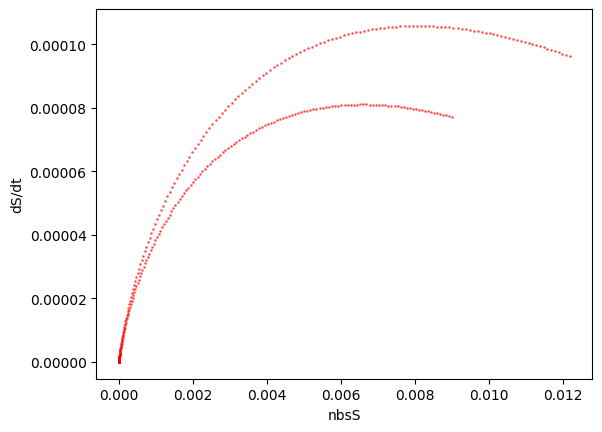

In [149]:
plt.scatter(nbsS[:-1, 0], dS[:, 0], c='r', s=1, alpha=0.5)
plt.scatter(nbsS[:-1, 10], dS[:, 10], c='r', s=1, alpha=0.5)
# plt.scatter(S[:-1, 3], dS[:, 3], c='r', s=1, alpha=0.5)
plt.xlabel("nbsS")
plt.ylabel("dS/dt")
plt.show()

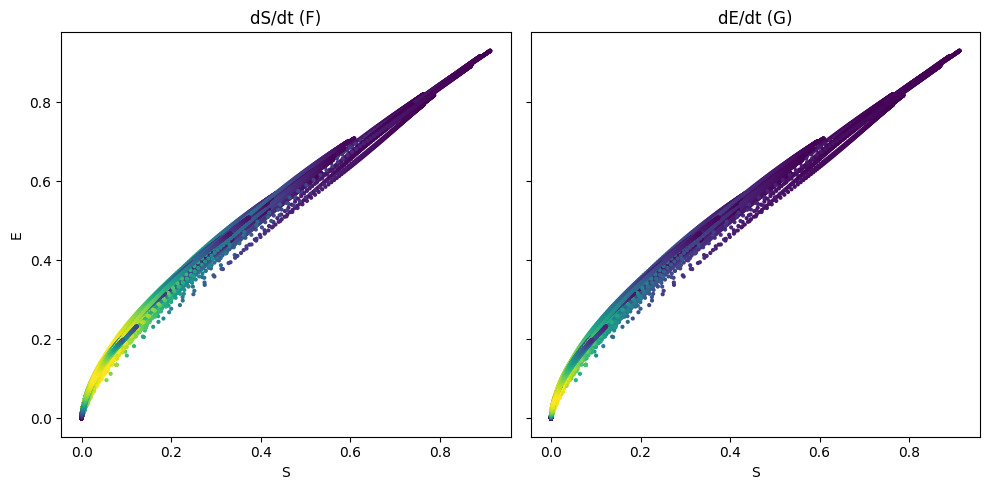

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for cell in range(len(dS)):
    axs[0].scatter(S[:-1, cell], E[:-1, cell], c=dS[:, cell], s=4, alpha=1.,)
    axs[1].scatter(S[:-1, cell], E[:-1, cell], c=dE[:, cell], s=4, alpha=1.,)
axs[0].set_xlabel("S")
axs[1].set_xlabel("S")
axs[0].set_ylabel("E")

axs[0].set_title("dS/dt (F)")
axs[1].set_title("dE/dt (G)")

fig.tight_layout()
plt.show()


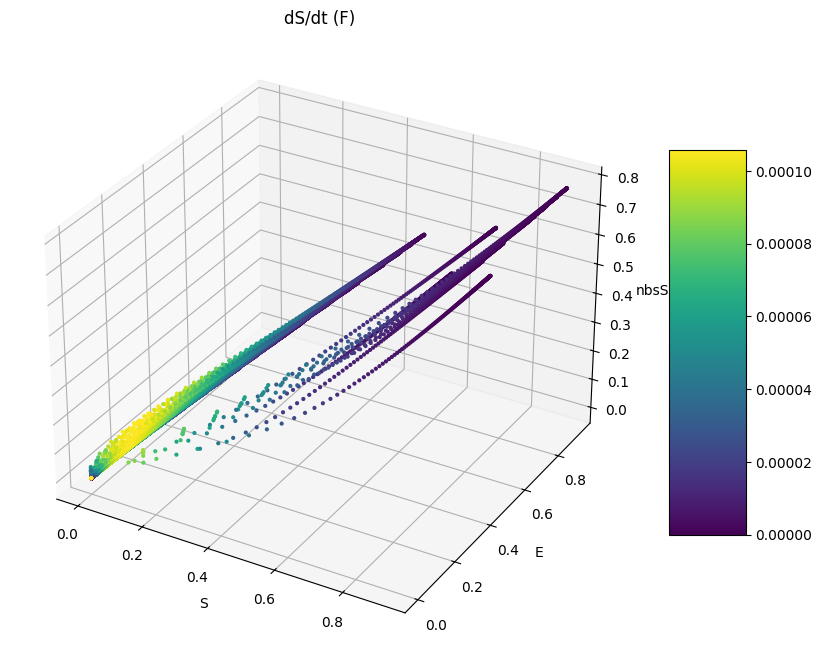

In [151]:
# %matplotlib ipympl



from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for cell in range(len(dS)):
    ax.scatter(S[:-1, cell], E[:-1, cell], nbsS[:-1, cell], c=dS[:, cell], s=4, alpha=1.,)

ax.set_xlabel("S")
ax.set_ylabel("E")
ax.set_zlabel("nbsS")
ax.set_title("dS/dt (F)")
plt.colorbar(ax.collections[0], ax=ax, shrink=0.5, aspect=5)
plt.show()

In [152]:
dS.shape

(200, 1000)

In [153]:
S.shape

(201, 1000)

C:\Users\jakob\AppData\Local\Temp\ipykernel_20648\3973412826.py:8: RuntimeWarning: invalid value encountered in divide
  vec = vec / np.linalg.norm(vec, axis=1)[:, np.newaxis]/50


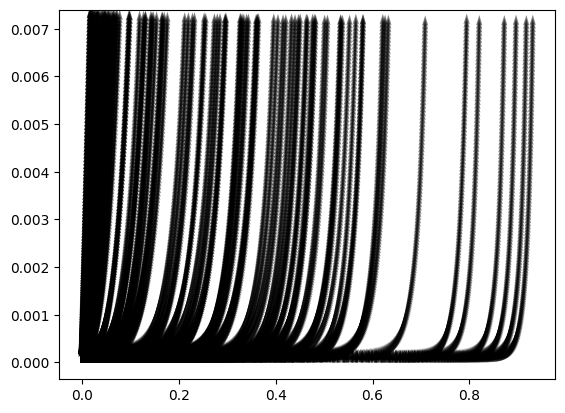

In [154]:
# see how dS/dt change as a function of different parameters
cell = 50
y = S[:-1, cell]
for cell in range(100):
    for x_axis in [E[:-1, cell],]:
        vec = np.array([dS[:,cell], dE[:,cell]])
        vec = vec.T
        vec = vec / np.linalg.norm(vec, axis=1)[:, np.newaxis]/50
        plt.quiver(x_axis, y, vec[:,0], vec[:,1], angles='xy', scale_units='xy', scale=50, color='k', alpha=0.5)

In [155]:
np.mean(dS>dE)

0.257375

In [156]:
nbsE.shape

(201, 1000)

In [157]:
border_mask_stacked = np.stack([border_mask]*len(nbsE), axis=0)

In [158]:
border_mask_stacked.shape

(201, 1000)

In [159]:
# %matplotlib inline


hypervector = np.array([S[:-1], E[:-1], nbsS[:-1], nbsE[:-1], border_mask_stacked[:-1]])
allcoeffs = []
local_stds = []
for cell in range(100):
    hypery = dE[:, cell]


    hyperx = hypervector[:,:,cell].T
    hyperx.shape



    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import NearestNeighbors

    def fit_local_hyperplane(X, y, point, k=5):
        nbrs = NearestNeighbors(n_neighbors=k).fit(X)
        distances, indices = nbrs.kneighbors([point])
        
        
        model = LinearRegression().fit(X[indices[0]], y[indices[0]])

        local_std = np.std(y[indices[0]])
        return model, local_std


    num_points = 20
    sample_indices = np.random.choice(len(hyperx), size=num_points, replace=False)
    anchor_points = hyperx[sample_indices]

    models = []
    stds = []
    for pt in anchor_points:
        model, local_std = fit_local_hyperplane(hyperx, hypery, pt, k=8)
        models.append(model)
        stds.append(local_std)

    coefs = np.array([m.coef_ for m in models])
    allcoeffs.extend(coefs)
    local_stds.append(np.max(stds))

allcoeffs = np.array(allcoeffs)
local_stds = np.array(local_stds)

c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


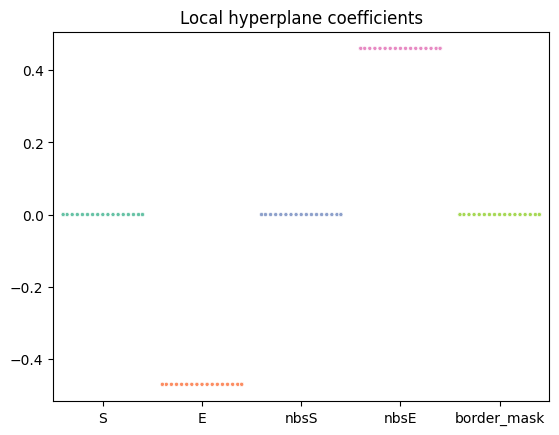

In [160]:

import seaborn as sns
plt.close()
sns.swarmplot(data=coefs, palette="Set2", linewidth=0.5, alpha=1, s=3, edgecolor="white")
plt.title("Local hyperplane coefficients")
names = ["S", "E", "nbsS", "nbsE", "border_mask"]
plt.xticks(ticks=range(len(names)), labels=names, rotation=0)
plt.show()

In [161]:
allcoeffs[np.abs(allcoeffs) > 50] = 0. 

In [169]:
allcoeffs.shape

(2000, 5)

c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\drosophila\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\droso

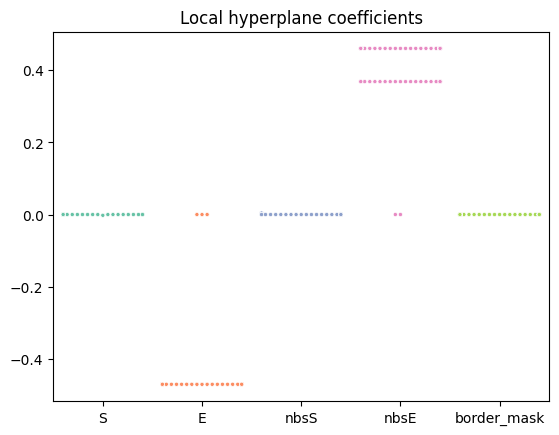

In [163]:
plt.close()
sns.swarmplot(data=allcoeffs[:300], palette="Set2", linewidth=0.5, alpha=1, s=3, edgecolor="white")
plt.title("Local hyperplane coefficients")
names = ["S", "E", "nbsS", "nbsE", "border_mask"]
plt.xticks(ticks=range(len(names)), labels=names, rotation=0)
plt.show()

In [164]:
allcoeffs[1]

array([-2.92080734e-10, -4.70000000e-01,  2.38895304e-10,  4.59999923e-01,
        0.00000000e+00])

In [165]:
threshold = 0.
high = np.mean(allcoeffs > threshold, axis=0)
low = np.mean(allcoeffs < threshold, axis=0)
zero = np.mean(np.abs(allcoeffs) <= threshold, axis=0)
names = ["S", "E", "nbsS", "nbsE", "border_mask"]
print(names)
print("percentage positive coefficients:", high)
print("percentage negative coefficients:", low)
print("percentage zero coefficients:", zero)

['S', 'E', 'nbsS', 'nbsE', 'border_mask']
percentage positive coefficients: [0.495  0.     0.4835 0.983  0.    ]
percentage negative coefficients: [0.4825 0.979  0.4995 0.     0.    ]
percentage zero coefficients: [0.0225 0.021  0.017  0.017  1.    ]


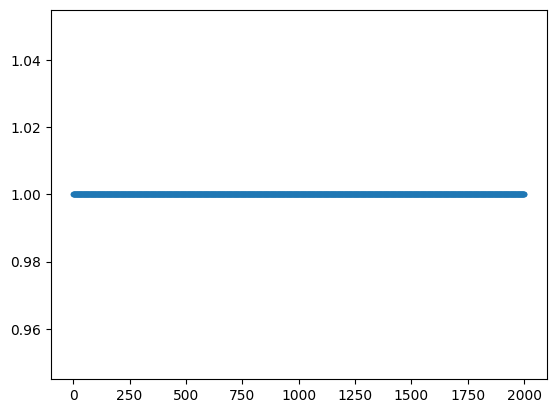

In [166]:
plt.plot((allcoeffs >= -1e-11)[:,3],'.')
plt.show()

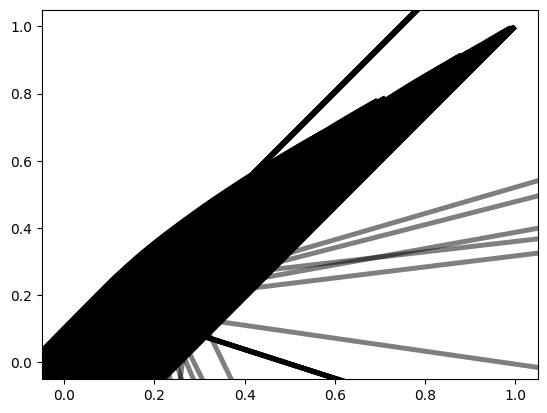

In [167]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# for cell in range(len(dS)):
#     axs[0].scatter(S[:-1, cell], E[:-1, cell], c=dS[:, cell], s=4, alpha=1.,)
#     axs[1].scatter(S[:-1, cell], E[:-1, cell], c=dE[:, cell], s=4, alpha=1.,)
# axs[0].set_xlabel("S")
# axs[1].set_xlabel("S")
# axs[0].set_ylabel("E")

# axs[0].set_title("dS/dt (F)")
# axs[1].set_title("dE/dt (G)")

# fig.tight_layout()
# plt.show()

XX = dS[:].flatten()/np.max(dS[:])*2. - 1.
YY = dE[:].flatten()/np.max(dE[:])*2. - 1.

plt.quiver(S[:-1, :], E[:-1, :], XX, YY, color='k', alpha=0.5, scale=0.1, width=0.01)

In [ ]:
positions

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.14803186, 0.7043009 ],
       [0.70741147, 0.69062161],
       [0.60246526, 0.79582952]])

In [234]:
hypery = dE
print(hypervector.shape)
print(hypery.shape)

(5, 200, 1000)
(200, 1000)


In [220]:
names = ["S", "E", "nbsS", "nbsE", "border_mask"]
sub_names = names[:2]
sub_hypervector = hypervector[:2]

In [303]:
check = 0
other_param = hypervector[1]

all_other_params = hypervector[2:-1]

print(all_other_params.shape)

param_extends = (np.min(other_param), np.max(other_param))


print("param_extends", param_extends)

from itertools import product
# Create a grid of points in the parameter space


slice_targets = np.linspace(param_extends[0], param_extends[1], 20)


pppppppp = np.product([(aop > 0.45)*(aop < 0.55) for aop in all_other_params], axis=0).astype(bool)
print("pppppppp shape", pppppppp.shape)
slices = [(other_param > slice_targets[i])*(other_param < slice_targets[i+1])*(pppppppp) for i in range(len(slice_targets)-1)]

print("len slices", len(slices))

print("slices 0 shape", slices[0].shape)
print("slices 0", slices[0])

# slice_in_0 = hypervector[1:, slice]
y_slices = [hypery[slice] for slice in slices]
x_slices = [hypervector[0, slice] for slice in slices]

# caclulate how close every slice is to being uniform


(2, 200, 1000)
param_extends (0.0, 0.9999088208103453)
pppppppp shape (200, 1000)
len slices 19
slices 0 shape (200, 1000)
slices 0 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [306]:
x_slices

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.41427662, 0.41765445, 0.42135689, 0.42426308, 0.42708891,
        0.42983772, 0.43251266, 0.41931911, 0.43511669, 0.43765263,
        0.4401231 , 0.42233527, 0.44253061, 0.42506353, 0.42772213,
        0.42355337, 0.42590726, 0.42820573, 0.43045051, 0.42483989,
        0.42658627, 0.42829715, 0.42454709, 0.42997349, 0.4263195 ,
        0.42483695, 0.43161623, 0.42805477, 0.42649315, 0.43322627,
        0.42811617, 0.43480445, 0.42970683, 0.43126596, 0.43279432,
        0.43429269, 0.43576178, 0.4279444 , 0.42875402, 0.42955027]),
 array([0.41878187, 0.41805007, 0.42122307, 0.42156145, 0.41924365,
        0.41949889, 0.42241949, 0.42235922, 0.42256817, 0.42543926,
        0.42038483, 0.42838129, 0.42337047, 0.44487753, 0.4471661 ,
       

In [307]:
y_slices

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.00427412, 0.00350338, 0.00282195, 0.00274916, 0.00267919,
        0.00261186, 0.00254703, 0.0029193 , 0.00248454, 0.00242429,
        0.00236613, 0.00252246, 0.00230998, 0.00245635, 0.00239263,
        0.00221619, 0.00216137, 0.00210838, 0.00205714, 0.00178808,
        0.0017504 , 0.00171374, 0.00176393, 0.00167805, 0.00172672,
        0.0016411 , 0.00164331, 0.00169051, 0.00160587, 0.00160947,
        0.00157162, 0.00157652, 0.0015383 , 0.00150588, 0.00147434,
        0.00144363, 0.00141373, 0.00081827, 0.00080406, 0.00079014]),
 array([0.00413827, 0.00342123, 0.00340732, 0.00332555, 0.00291958,
        0.00299916, 0.00284213, 0.00284008, 0.00292137, 0.0027678 ,
        0.00267728, 0.00269618, 0.00260447, 0.00225571, 0.00220325,
       

(array([1.22121854e+03, 6.46764400e+02, 3.58002892e+02, 2.28151321e+02,
        1.53251707e+02, 1.13164589e+02, 8.68873882e+01, 6.62684164e+01,
        5.14994784e+01, 4.15256502e+01, 3.39493768e+01, 2.76198320e+01,
        2.40714508e+01, 1.87968301e+01, 1.53443511e+01, 1.18918721e+01,
        1.05492414e+01, 8.24758873e+00, 6.90495800e+00, 5.85003386e+00,
        4.31559875e+00, 3.64428339e+00, 2.87706583e+00, 2.39755486e+00,
        2.30165267e+00, 1.91804389e+00, 1.05492414e+00, 1.34263072e+00,
        5.75413167e-01, 8.63119750e-01, 2.87706583e-01, 6.71315361e-01,
        3.83608778e-01, 2.87706583e-01, 4.79510972e-01, 9.59021945e-02,
        1.91804389e-01, 2.87706583e-01, 9.59021945e-02, 0.00000000e+00,
        9.59021945e-02, 1.91804389e-01, 0.00000000e+00, 0.00000000e+00,
        9.59021945e-02, 9.59021945e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.59021945e-02]),
 array([9.11791897e-05, 4.08175908e-04, 7.25172627e-04, 1.04216935e-03,
        1.35916606e-03

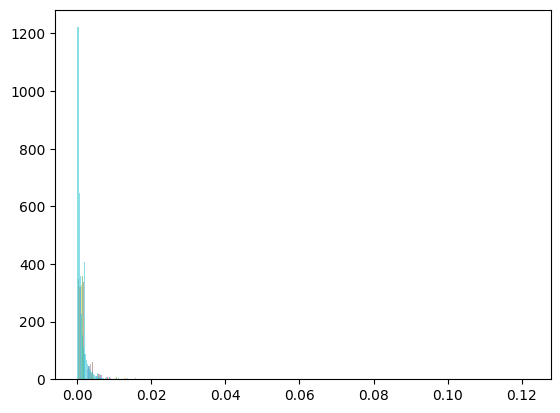

In [305]:
# make histogram of the two slices over same range
plt.hist(y_slice_1, bins=50, alpha=0.5, label='Slice 1', density=True)
plt.hist(y_slice_2, bins=50, alpha=0.5, label='Slice 2', density=True)

$$dF/dE = 0$$
$$dF/dS = ?$$
$$dG/dE = ?$$
$$dG/dS = ?$$